In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
housepricing=pd.read_csv("/content/drive/MyDrive/Classroom/Housing.csv")

In [4]:
housepricing.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [5]:
housepricing.shape

(545, 13)

In [6]:
housepricing.shape

(545, 13)

In [7]:
housepricing.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [8]:
housepricing.isnull().sum()*100/housepricing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

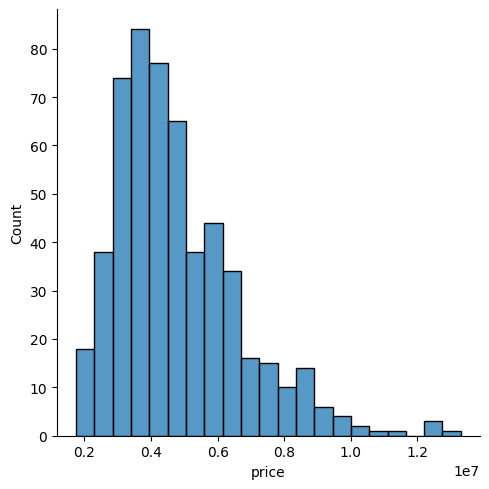

In [9]:
sns.displot(housepricing['price'])

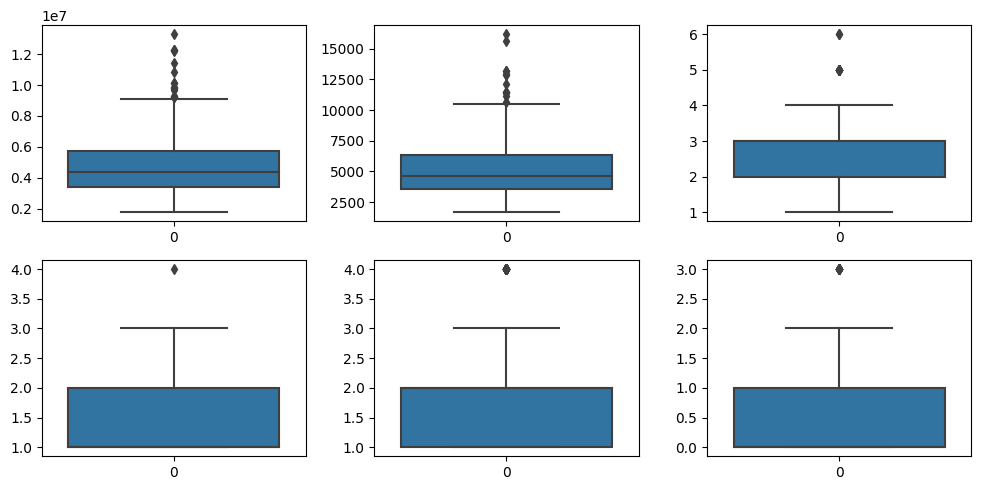

In [10]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housepricing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housepricing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housepricing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housepricing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housepricing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housepricing['parking'], ax = axs[1,2])

plt.tight_layout()

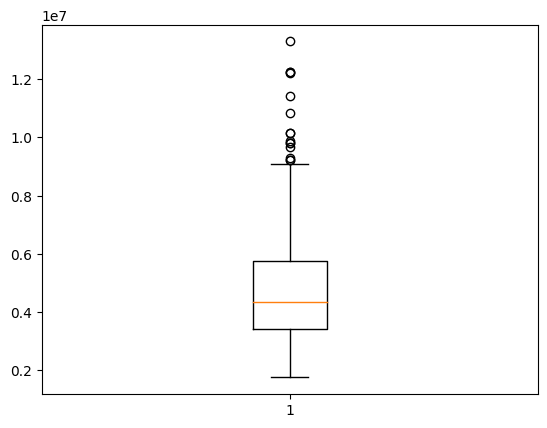

In [11]:
plt.boxplot(housepricing.price)
Q1 = housepricing.price.quantile(0.25)
Q3 = housepricing.price.quantile(0.75)
IQR = Q3 - Q1
housepricing = housepricing[(housepricing.price >= Q1 - 1.5*IQR) & (housepricing.price <= Q3 + 1.5*IQR)]

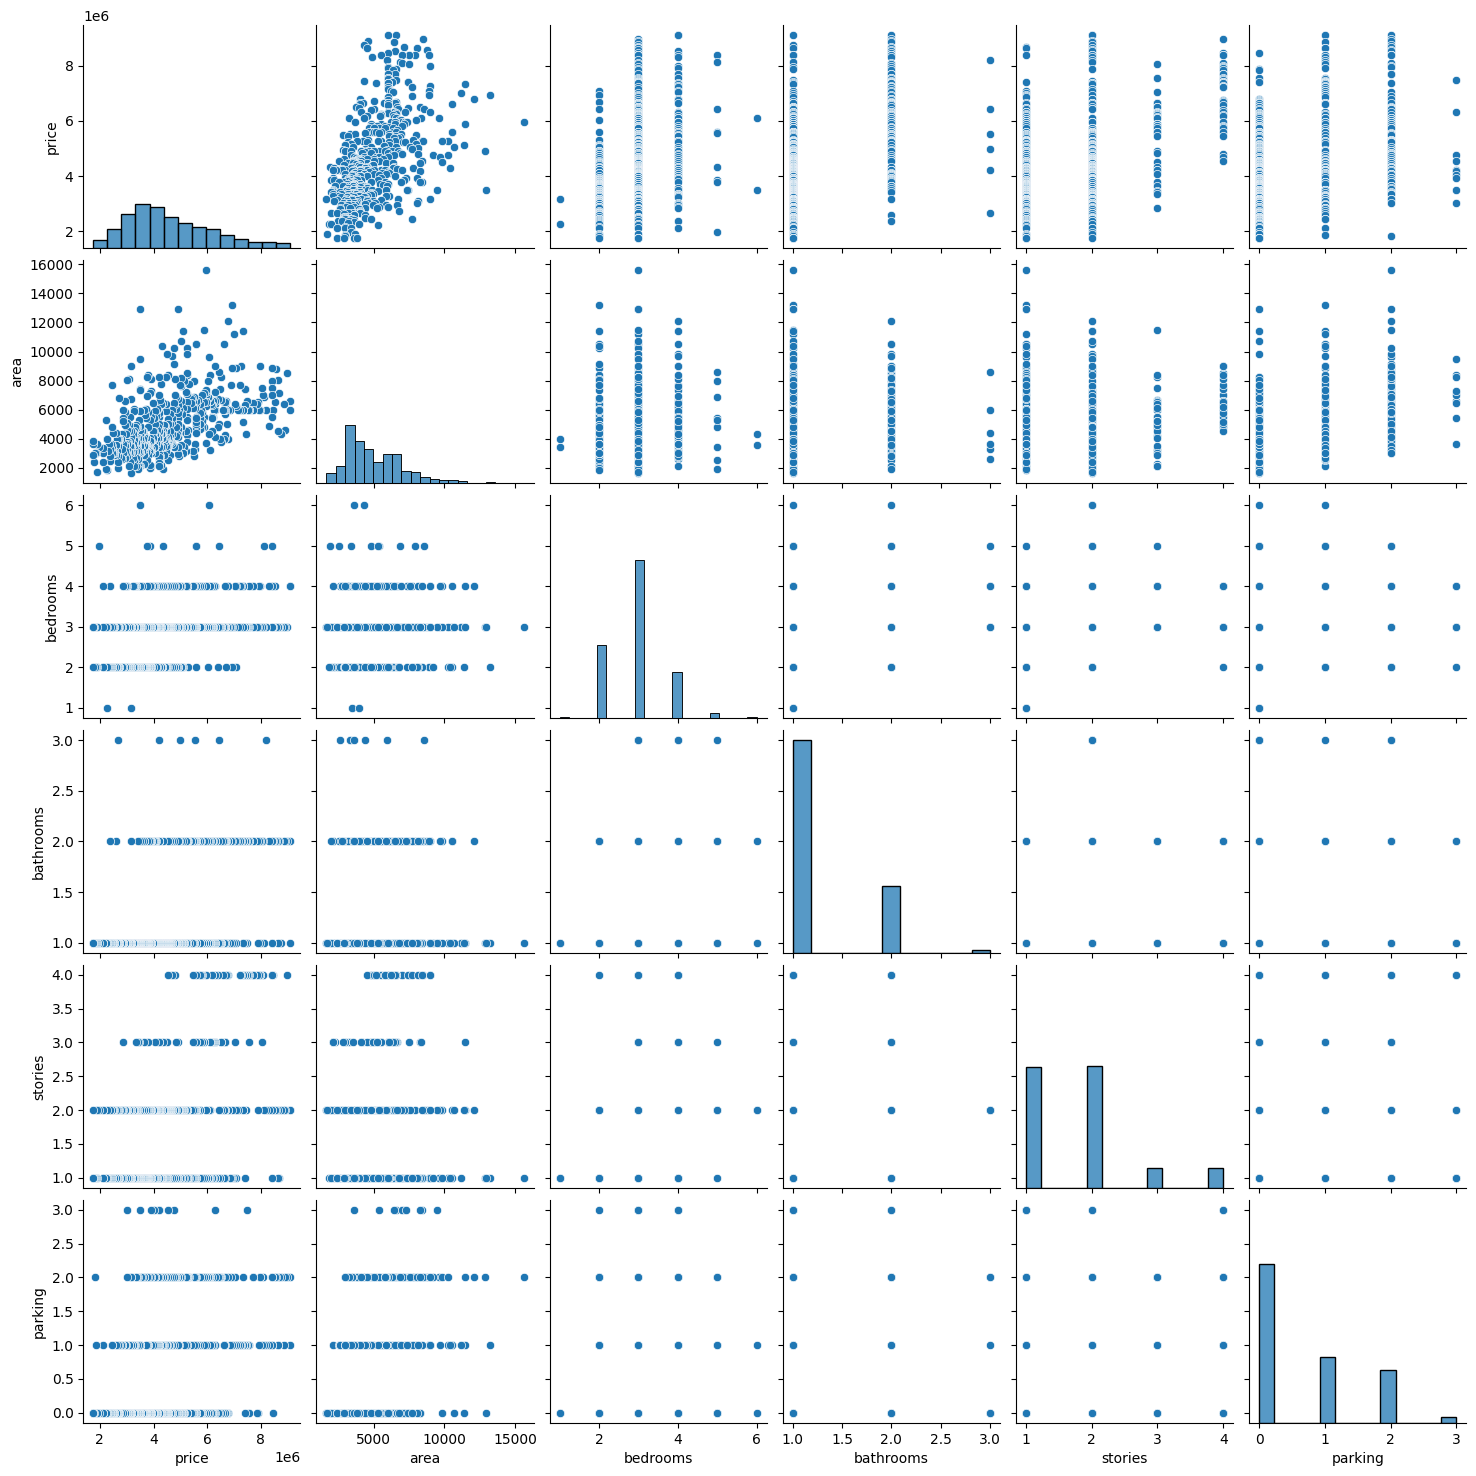

In [13]:
sns.pairplot(housepricing)
plt.show()

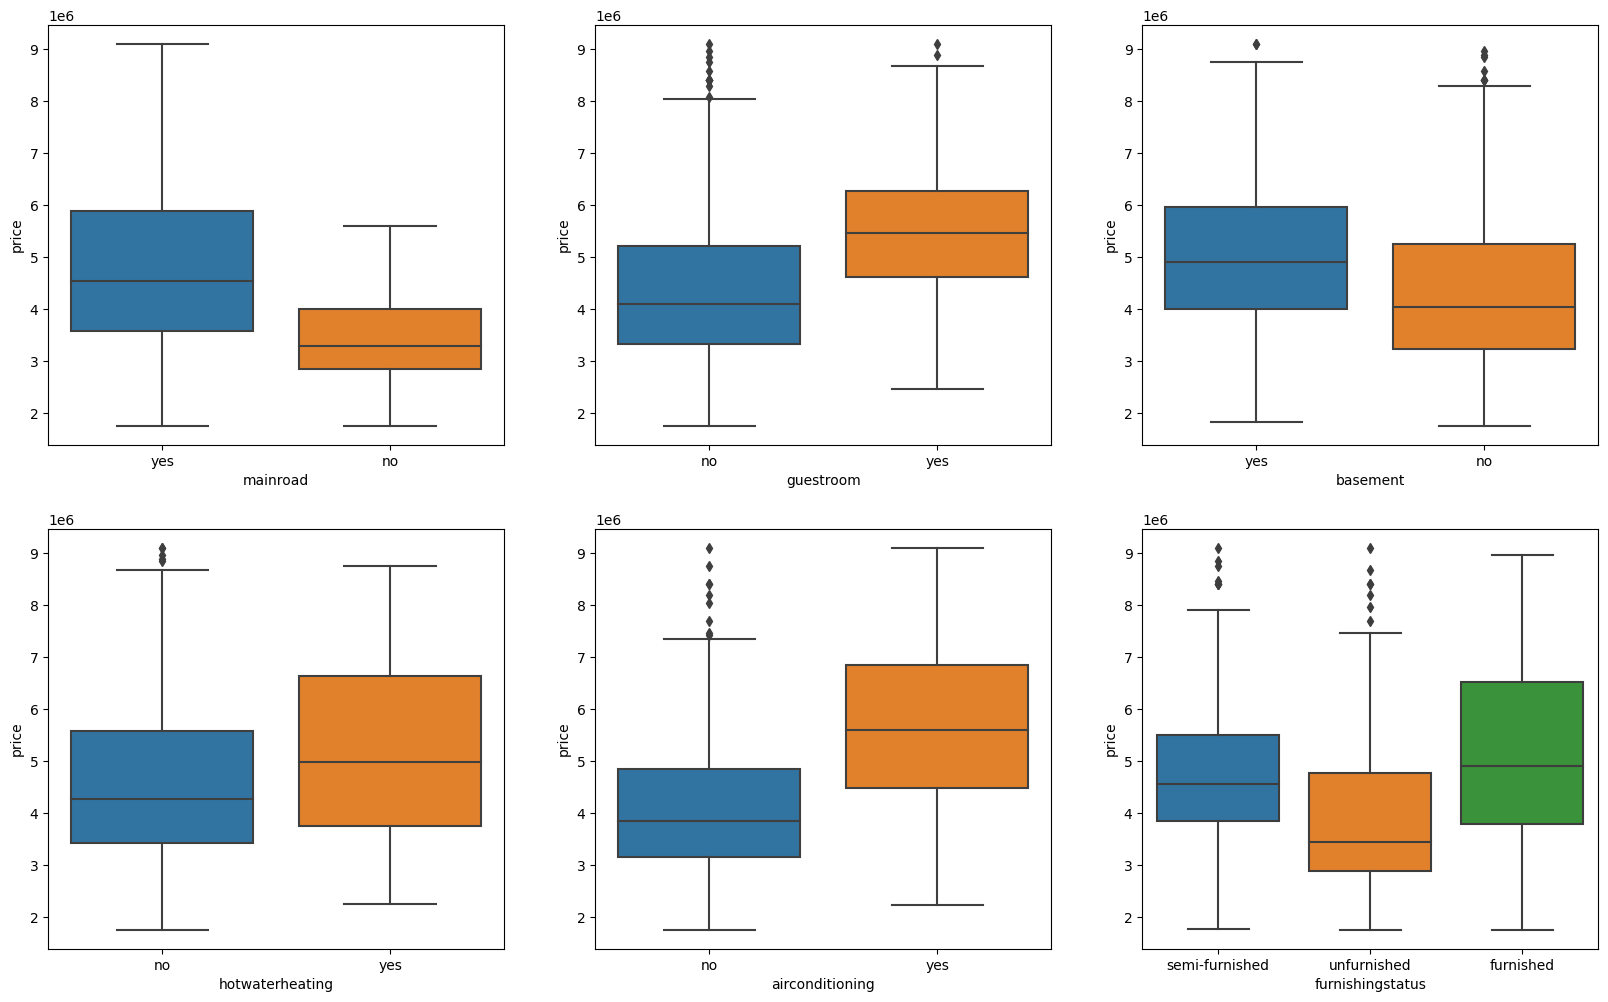

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housepricing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housepricing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housepricing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housepricing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housepricing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housepricing)
plt.show()

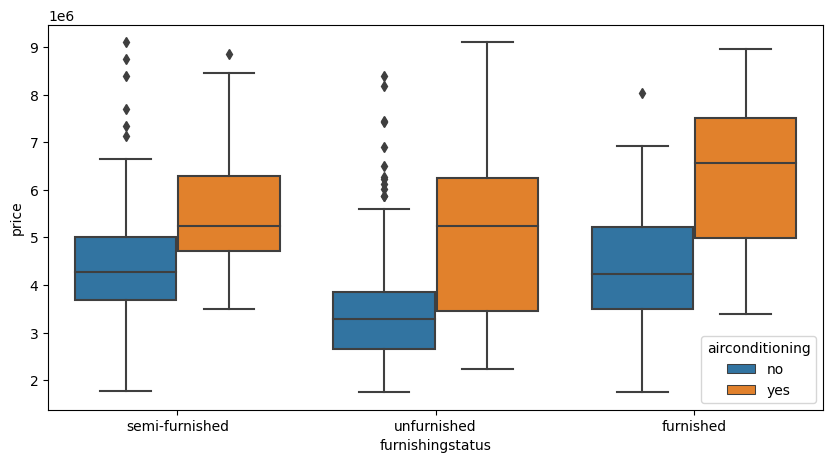

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housepricing)
plt.show()

In [16]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housepricing[varlist] = housepricing[varlist].apply(binary_map)

In [17]:
housepricing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [18]:
status = pd.get_dummies(housepricing['furnishingstatus'])

In [19]:
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [20]:
status = pd.get_dummies(housepricing['furnishingstatus'], drop_first = True)

In [21]:
housepricing = pd.concat([housepricing, status], axis = 1)

In [22]:
housepricing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [23]:
housepricing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [24]:
housepricing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [25]:
X = housepricing.drop(['price'],axis =1)
y =housepricing['price']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(y_test_pred)

[5832190.25067735 4746657.69156266 6274859.93635193 3852171.37479281
 4474905.11555893 5968058.09988365 4408555.87183571 2462304.35657169
 2860865.24071823 5703781.55681574 7577021.44247758 3414974.93873737
 6713109.58970331 3764315.56735964 3488225.91946642 2332724.05732714
 7412805.88301596 5552154.25565537 4326858.06008733 2767079.29646105
 3125018.39465865 4203332.6860202  5882141.38830021 5883340.05153646
 4439806.4728002  3511360.77384381 6152149.24925353 5132943.12715525
 4853372.17436546 4464883.98451652 6096507.63528527 6163146.97526713
 2451706.22541461 3679804.18435151 6075786.92678763 4651491.19508264
 4550500.00545184 6611071.5259623  6648134.43829522 4207147.20119939
 3983247.29798885 3394977.93569746 4951834.80657274 4361862.05512532
 2985039.37337927 2859065.51044464 4158627.68662917 4818819.86744941
 4969850.78111667 5996082.74514538 3387476.83415359 3927179.41187002
 2751018.89377929 6091811.67413559 3274265.24315618 3947121.68657457
 3230873.17968389 4872487.10112181

In [37]:
print(f"Intercept: {reg.intercept_}")

Intercept: 625898.0109755709


In [38]:
print(f"Coefficient: {reg.coef_}")

Coefficient: [ 1.99970030e+02  1.01584495e+05  8.11994474e+05  4.12331227e+05
  4.06359435e+05  3.79603442e+05  3.16981521e+05  7.99472324e+05
  7.63325215e+05  1.69705311e+05  5.82649816e+05 -8.53520308e+04
 -3.28577537e+05]


In [39]:
price_prediction = pd.DataFrame({'Actual':y_test.squeeze(), 'Predicted':y_test_pred.squeeze()})
print(price_prediction)

      Actual     Predicted
155  5530000  5.832190e+06
413  3430000  4.746658e+06
21   8680000  6.274860e+06
349  3780000  3.852171e+06
337  3920000  4.474905e+06
..       ...           ...
356  3773000  4.924077e+06
446  3150000  4.200180e+06
146  5600000  4.643791e+06
353  3780000  4.539763e+06
529  2275000  3.755953e+06

[106 rows x 2 columns]


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
import math
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual,predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual,predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual,predicted)))

In [42]:
print_metrics(y_train,y_train_pred)

MSE is 787264870865.9994
RMSE is 887279.4773159128
MAE is 671425.8750750026


In [43]:
r2 = r2_score(y_train,y_train_pred)
adj_r2=1-(1-r2_score(y_train,y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

r2:0.6587959016827185
Adj_r2:0.6479772351507072


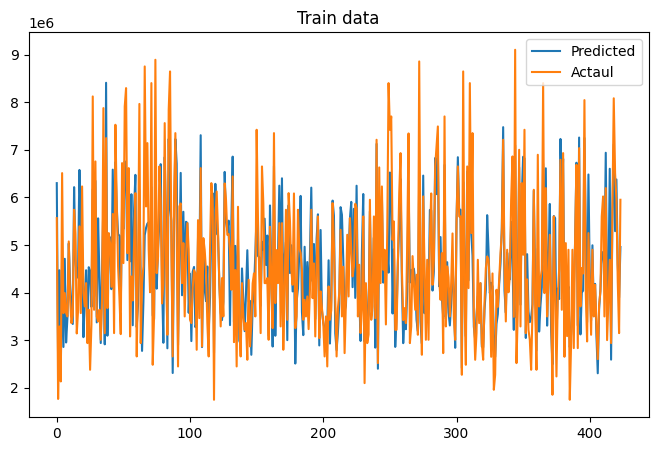

In [44]:
plt.figure(figsize=(8,5))
plt.title("Train data")
plt.plot(y_train_pred)
plt.plot(np.array(y_train))
plt.legend(["Predicted",'Actaul'])
plt.show()

In [45]:
print_metrics(y_test,y_test_pred)

MSE is 1148203524699.7427
RMSE is 1071542.5911739313
MAE is 784877.264107492


In [46]:
r2 = r2_score(y_test,y_test_pred)
adj_r2=1-(1-r2_score(y_test,y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

r2:0.6684003582833372
Adj_r2:0.6215438871712


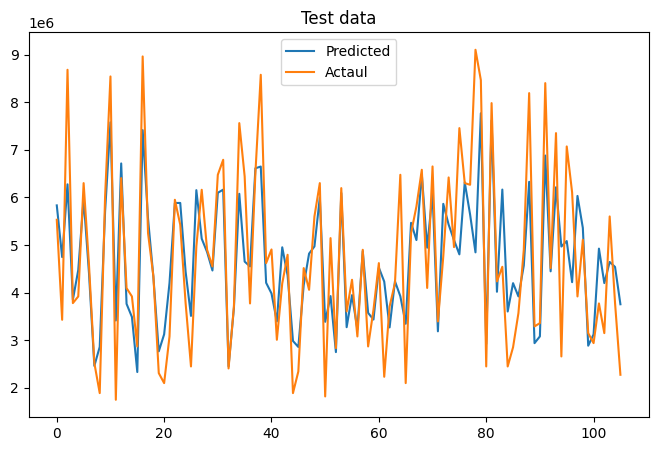

In [47]:
plt.figure(figsize=(8,5))
plt.title("Test data")
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted",'Actaul'])
plt.show()